## **Análisis estadístico**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

----

**Cargar conjunto de datos**

In [3]:
df_2012_2023 = pd.read_csv('../data/processed/mex_trade_2012_2023_clean.csv')
df_2012_2023.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2012,1,Total Exports,"27,281.58",Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2012,1,Petroleum,"4,628.30",Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2012,1,Crude Oil,"4,008.11",Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2012,1,Other Oil,620.18,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2012,1,Non Petroleum,"22,653.28",Final Figures


---

**Calcular *media*, *mediana* y *desviación estándar* de *value_usd* por *año*, *tipo de operación*, *conceptos***

In [26]:
estadisticas_agrupadas = df_2012_2023.groupby(['year', 'type', 'concept'])['value_usd'].agg(
    mean_value=('mean'),
    median_value=('median'),
    std_value=('std')
).reset_index() 

print("Media, Mediana y Desviación Estándar de value_usd por Año, Tipo y Concepto:")
estadisticas_agrupadas

Media, Mediana y Desviación Estándar de value_usd por Año, Tipo y Concepto:


,year,type,concept,mean_value,median_value,std_value
0,2012,Exports,Agrarian,909.52,926.98,214.57
1,2012,Exports,Crude Oil,"3,904.36","3,970.42",367.57
2,2012,Exports,Extractive,408.87,417.26,75.10
3,2012,Exports,Manufacturing,"25,166.14","25,374.98","1,744.81"
4,2012,Exports,Non Petroleum,"26,484.53","26,548.44","1,739.51"
...,...,...,...,...,...,...
211,2023,Imports,Petroleum,"4,557.91","4,572.92",565.72
212,2023,Imports,Total Imports,"50,384.67","51,450.77","2,685.91"
213,2023,Imports,Total Imports CIF (Total Imports + Freight and...,"52,323.05","53,417.50","2,767.90"
214,2023,Not applicable,Total Trade Balance Exports Total - Imports Total,"-1,033.60","-1,129.14","1,429.27"


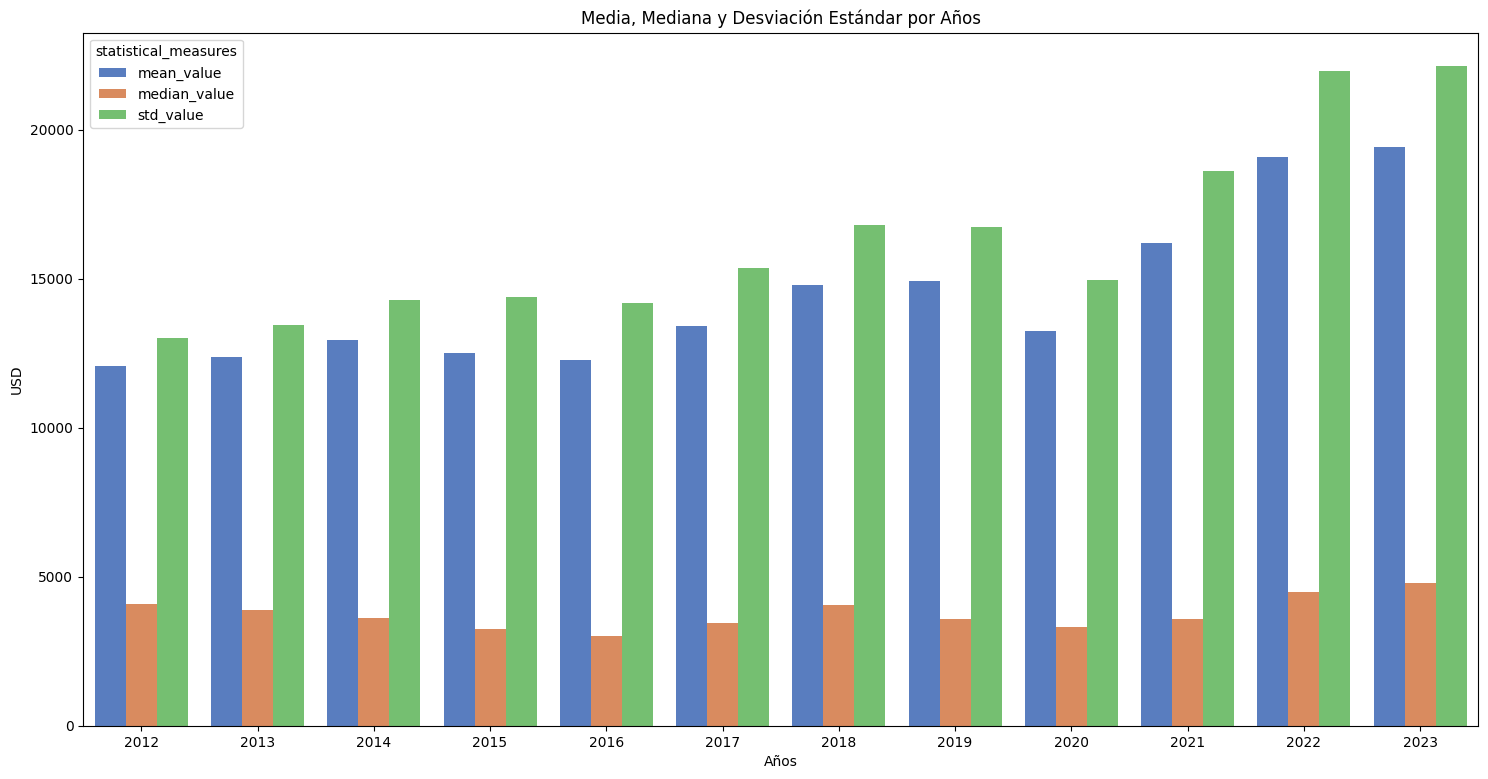

In [69]:
estadisticas_anuales = df_2012_2023.groupby('year')['value_usd'].agg(
    mean_value = ('mean'),
    median_value = ('median'),
    std_value = ('std')
).reset_index()

estadisticas_anuales_melted = estadisticas_anuales.melt(id_vars='year', var_name='statistical_measures', value_name='statistics')

plt.figure(figsize=(18,9))
sns.barplot(estadisticas_anuales_melted, x='year', y='statistics', hue='statistical_measures', palette='muted')
plt.title("Media, Mediana y Desviación Estándar por Años")
plt.xlabel("Años")
plt.ylabel("USD")
plt.show()

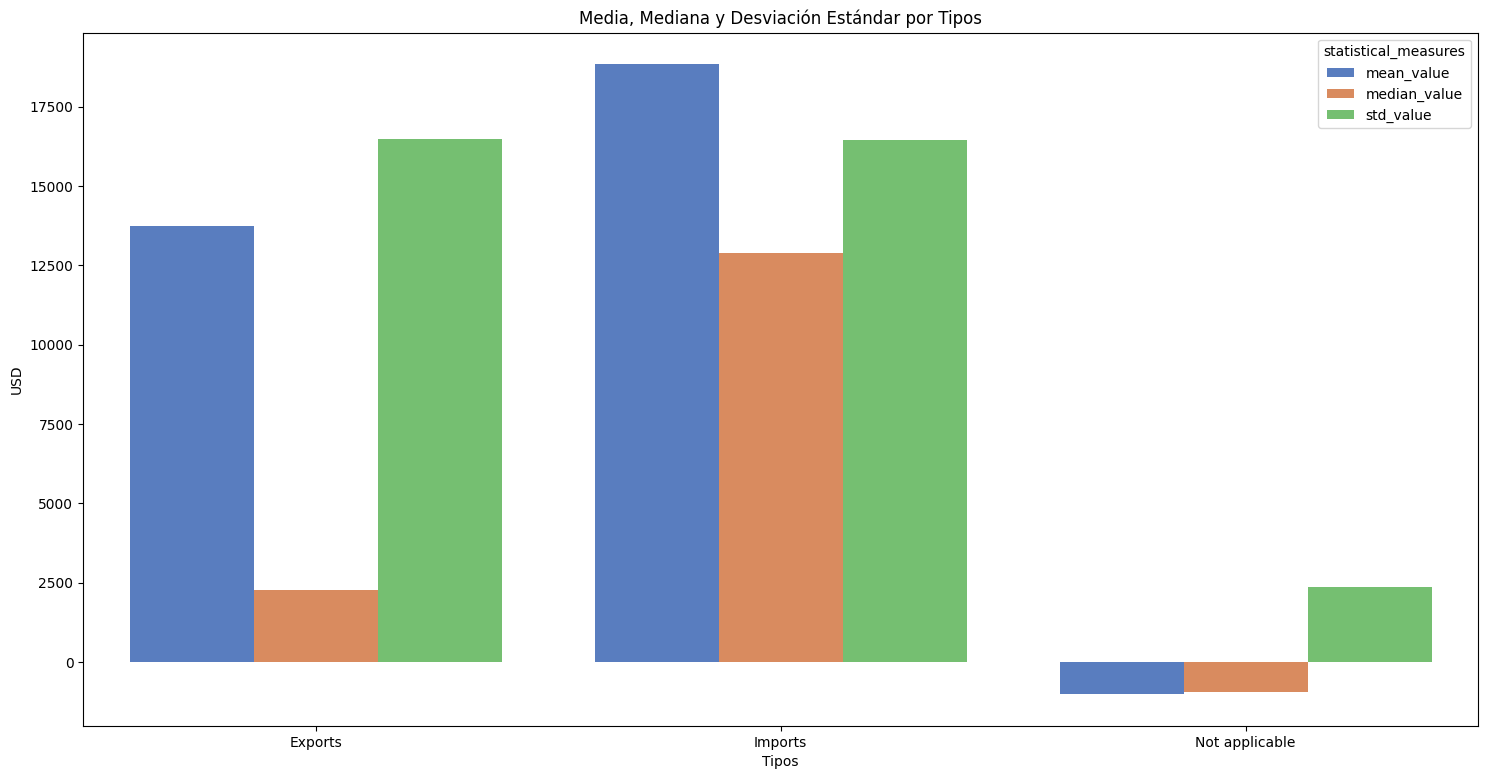

In [70]:
estadisticas_tipos = df_2012_2023.groupby('type')['value_usd'].agg(
    mean_value = ('mean'),
    median_value = ('median'),
    std_value = ('std')
).reset_index()

estadisticas_tipos_melted = estadisticas_tipos.melt(id_vars='type', var_name='statistical_measures', value_name='statistics')

plt.figure(figsize=(18,9))
sns.barplot(estadisticas_tipos_melted, x='type', y='statistics', hue='statistical_measures', palette='muted')
plt.title("Media, Mediana y Desviación Estándar por Tipos")
plt.xlabel("Tipos")
plt.ylabel("USD")
plt.show()

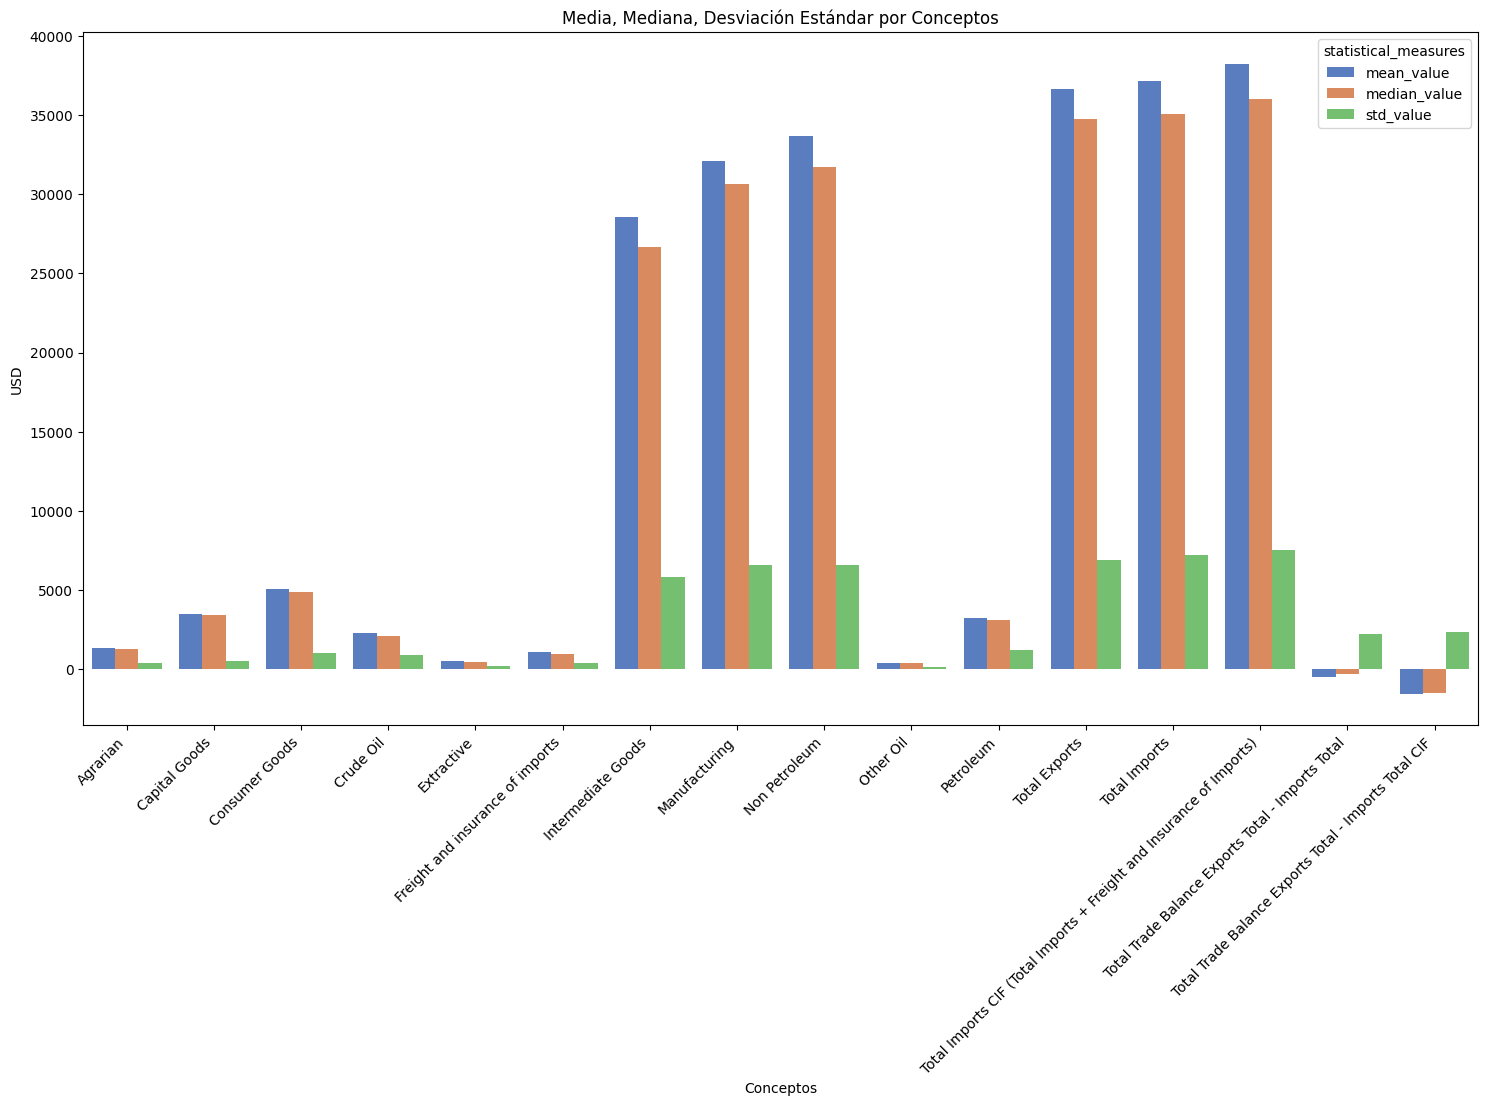

In [73]:
estadisticas_conceptos = df_2012_2023.groupby('concept')['value_usd'].agg(
    mean_value = ('mean'),
    median_value = ('median'),
    std_value = ('std')
).reset_index()

estadisticas_conceptos_melted = estadisticas_conceptos.melt(id_vars='concept', var_name='statistical_measures', value_name='statistics')

plt.figure(figsize=(18,9))
sns.barplot(estadisticas_conceptos_melted, x='concept', y='statistics', hue='statistical_measures', palette='muted')
plt.title('Media, Mediana, Desviación Estándar por Conceptos')
plt.xlabel("Conceptos")
plt.ylabel("USD")
plt.xticks(rotation=45, ha='right' )
plt.show()

---

**Intervalos de confianza para la media anual**

In [20]:
estadisticas = df_2012_2023.groupby(['year', 'type', 'concept'])['value_usd'].agg(
    mean_value=('mean'),
    std_value=('std'),
    count_value=('count')
).reset_index()

estadisticas['sem'] = estadisticas.apply(
    lambda row: row['std_value'] / np.sqrt(row['count_value']) if row['count_value'] > 1 else np.nan,
    axis=1
)

confidence_level = 0.95
alpha = 1 - confidence_level

estadisticas['t_score'] = estadisticas.apply(
    lambda row: stats.t.ppf(1 - alpha/2, row['count_value'] - 1) if row['count_value'] > 1 else np.nan,
    axis=1
)

estadisticas['margin_of_error'] = estadisticas['t_score'] * estadisticas['sem']

estadisticas['lower_bound_95_ci'] = estadisticas['mean_value'] - estadisticas['margin_of_error']
estadisticas['upper_bound_95_ci'] = estadisticas['mean_value'] + estadisticas['margin_of_error']

resultados_ci = estadisticas[['year', 'type', 'concept', 'mean_value', 'lower_bound_95_ci', 'upper_bound_95_ci', 'count_value']].round(2)

print("Intervalos de Confianza (95%) para la Media Anual de value_usd:")
resultados_ci

Intervalos de Confianza (95%) para la Media Anual de value_usd:


,year,type,concept,mean_value,lower_bound_95_ci,upper_bound_95_ci,count_value
0,2012,Exports,Agrarian,909.52,773.19,"1,045.85",12
1,2012,Exports,Crude Oil,"3,904.36","3,670.82","4,137.91",12
2,2012,Exports,Extractive,408.87,361.15,456.59,12
3,2012,Exports,Manufacturing,"25,166.14","24,057.54","26,274.74",12
4,2012,Exports,Non Petroleum,"26,484.53","25,379.30","27,589.76",12
...,...,...,...,...,...,...,...
211,2023,Imports,Petroleum,"4,557.91","4,153.22","4,962.60",10
212,2023,Imports,Total Imports,"50,384.67","48,463.28","52,306.05",10
213,2023,Imports,Total Imports CIF (Total Imports + Freight and...,"52,323.05","50,343.01","54,303.08",10
214,2023,Not applicable,Total Trade Balance Exports Total - Imports Total,"-1,033.60","-2,056.04",-11.16,10


---

**Comparar varianzas de exportaciones vs importaciones**

In [24]:
print("--- Comparación Anual de Varianzas (Exportaciones vs Importaciones) ---")

# Obtener las varianzas anuales para Exports e Imports
varianzas_anuales = df_2012_2023.groupby(['year', 'type'])['value_usd'].var().unstack()

# Podemos iterar sobre los años y aplicar la prueba de Levene
for year in df_2012_2023['year'].unique():
    exports_year = df_2012_2023[(df_2012_2023['year'] == year) & (df_2012_2023['type'] == 'Exports')]['value_usd'].dropna()
    imports_year = df_2012_2023[(df_2012_2023['year'] == year) & (df_2012_2023['type'] == 'Imports')]['value_usd'].dropna()

    # Solo realizamos la prueba si hay suficientes datos en ambos grupos (al menos 2 para calcular varianza)
    if len(exports_year) > 1 and len(imports_year) > 1:
        stat_year, p_value_year = stats.levene(exports_year, imports_year)
        print(f"Año {year}:")
        print(f"  Varianza de Exportaciones: {np.var(exports_year):,.2f}")
        print(f"  Varianza de Importaciones: {np.var(imports_year):,.2f}")
        print(f"  Estadístico de Levene: {stat_year:.4f}, Valor p: {p_value_year:.4f}")
        if p_value_year < alpha:
            print("  -> Las varianzas son estadísticamente diferentes para este año.")
        else:
            print("  -> Las varianzas no son estadísticamente diferentes para este año.")
    else:
        print(f"\nAño {year}: No hay suficientes datos para comparar varianzas (Exports: {len(exports_year)}, Imports: {len(imports_year)})")

--- Comparación Anual de Varianzas (Exportaciones vs Importaciones) ---
Año 2012:
  Varianza de Exportaciones: 157,528,573.47
  Varianza de Importaciones: 168,677,391.88
  Estadístico de Levene: 4.6427, Valor p: 0.0324
  -> Las varianzas son estadísticamente diferentes para este año.
Año 2013:
  Varianza de Exportaciones: 170,305,154.89
  Varianza de Importaciones: 178,324,567.32
  Estadístico de Levene: 4.2552, Valor p: 0.0405
  -> Las varianzas son estadísticamente diferentes para este año.
Año 2014:
  Varianza de Exportaciones: 195,804,839.22
  Varianza de Importaciones: 198,400,390.51
  Estadístico de Levene: 3.6761, Valor p: 0.0567
  -> Las varianzas no son estadísticamente diferentes para este año.
Año 2015:
  Varianza de Exportaciones: 198,019,346.39
  Varianza de Importaciones: 197,617,360.26
  Estadístico de Levene: 3.4893, Valor p: 0.0633
  -> Las varianzas no son estadísticamente diferentes para este año.
Año 2016:
  Varianza de Exportaciones: 194,938,053.38
  Varianza de Im